# Simple (Semi) Real Worl Example

This notebook uses Linear Regression with Gradient Descent algorithm to find and fit parameters to a model used in an imaginary use case

## Problem Statement


Suppose you are the CEO of a restaurant franchise and are considering different cities for opening a new outlet.

- You would like to expand your business *to cities that may give your restaurant higher profits*.

- The chain already has restaurants in various cities and *you have data for profits and populations from the cities*.

- You *also have data on cities that are candidates* for a new restaurant. 
    - For these cities, you have the city population.
    
Can you use the data to help you identify which cities may potentially give your business higher profits?

**Hint**: There is a relationship between populations and profit from them that, once the data is inspected, can be observed.

We begin by importing libraries used in the notebook.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import copy
import math
%matplotlib inline

We also declare below helper functions to load the data:

In [32]:
def load_data(filename="../data/raw/data1.txt"):
    """
    Loads raw data from associated filename, if no filename parameter is passed.
        Returns: Tuple with vectors X and y, features and targets respectively
    """
    data = np.loadtxt(filename, delimiter=",")
    # Numpy Matrix containing the rows for x number of features of the dataset
    # : = all rows, 0 = first matrix column -> So selects all rows but only for the first column (features)
    X = data[:,0]
    # : = all rows, 1 =  second matrix column -> So selects all rows but only for the first column (target values)
    y = data[:,1]
    return X, y

def load_data_multivariables(filename="../data/raw/data2.txt"):
    """
    Loads raw data from associated filename, if no filename parameter is passed.
        Returns: Tuple with Matrix X and y vector, multiple features and targets respectively
    """
    data = np.loadtxt(filename, delimiter=",")
    # : = all rows, :2 = up to second column (non inclusive, starts at 0)  -> So selects all rows but only for the first TWO column (features)
    X = data[:,:2]
    # : = all rows, 3 = third matrix column -> So selects all rows but only for the third or last column (target values)
    y = data[:,2]
    return X, y



We can peek at the information for the first dataset with the `load_data()` method defined above:

In [33]:
x_train, y_train = load_data()
# Print X_train five first rows and its shape
print(f"x_train structure shape: {type(x_train)}")
print(f"y_train first five rows: {x_train[:5]}")

x_train structure shape: <class 'numpy.ndarray'>
y_train first five rows: [6.1101 5.5277 8.5186 7.0032 5.8598]


Even thought they are displayed horizontally, they should be seens as the five first rows of a Numpy vector (non transposed). Also, x_train contains decimal values that are all greater than zero.
These values represent the city population times 10,000
For example, 6.1101 means that the population for that city is 61,101. Now we can inspect y_tain and print also its five records

In [34]:
print(f"y_train structure shape: {type(y_train)}")
print(f"x_train first five rows: {y_train[:5]}")

y_train structure shape: <class 'numpy.ndarray'>
x_train first five rows: [17.592   9.1302 13.662  11.854   6.8233]


Similarly, y_train is a numpy array that has decimal values, some negative, some positive.

- These represent restaurant's average monthly profits in each city, in units of $10,000.
For example, 17.592 represents $175,920 in average monthly profits for that city.
- 2.6807 represents -$26,807 in average monthly loss for that city.

#### Checking data dimensions

It's also useful to inspect the dimensions of the dataset just loaded too:

In [35]:
print ('The shape of x_train is:', x_train.shape)
print ('The shape of y_train is: ', y_train.shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (97,)
The shape of y_train is:  (97,)
Number of training examples (m): 97


Both city populations array and the *monthly data profits* array have 97 points, which is consistent; so no data scrubbing is needed for the moment.

## Plotting and Visualizing the Data

It's quite useful to understand the data by visualizing it, which we can do by plotting it with myplotlib library.

- For this dataset, we can use a scatter plot to visualize the data, since it has only two properties to plot (profit and population).
- Many other problems that you will encounter in real life have more than two properties (for example, population, average household income, monthly profits, monthly sales). When we have more than two properties, you can still use a scatter plot to see the relationship between each pair of properties.

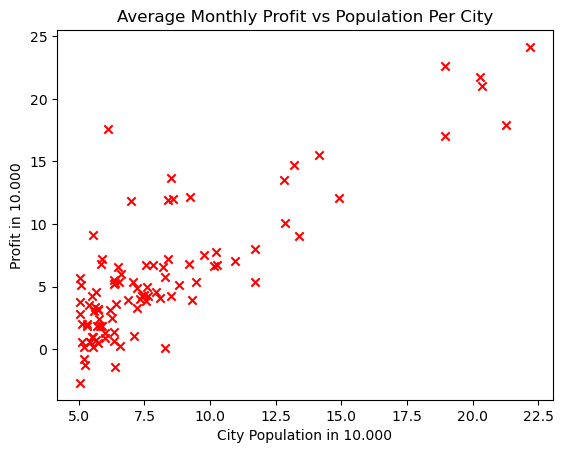

In [36]:
plt.scatter(x_train, y_train, marker='x', c='r')
# Set title
plt.title("Average Monthly Profit vs Population Per City")
# Set X and Y axis labels
plt.ylabel("Profit in 10.000")
plt.xlabel("City Population in 10.000")
plt.show()

The goal here is to build a Linear Regression (one feature) model to fit the data. With the model, then we can then input a new city's population, and have the model estimate the restaurant's potential monthly profits for that city.

## Linear Regression (Single Variable) Formulae Refresher

The following are the mathematical formulas used in Linear Regression (single variable), presented as a theory refresher, as our model is based on these. 

- The model function for linear regression, which is a function that maps from x (city population) to y (restaurant's monthly profit for that city) is represented as:
<br>
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
Also 

- To train a linear regression model, we want to find the best $(w,b)$ parameters that fit the dataset.  

    - To compare how one choice of $(w,b)$ is better or worse than another choice, we can evaluate it with a cost function $J(w,b)$
      - $J$ is a function of $(w,b)$. That is, the value of the cost $J(w,b)$ depends on the value of $(w,b)$.
  
    - The choice of $(w,b)$ that fits the data the best is the one that has the smallest cost $J(w,b)$.


- To find the values $(w,b)$ that gets the smallest possible cost $J(w,b)$, we can use a method called (algorithm) **Gradient Descent**. 
  - With each step of gradient descent, the parameters $(w,b)$ come closer to the optimal values that will achieve the lowest cost $J(w,b)$.

- The trained linear regression model can then take the input feature $x$ (city population) and output a prediction $f_{w,b}(x)$ (predicted monthly profit for a restaurant in that city).



## Cost Compute (Single Variable) Formulae Refresher

<a name="5"></a>

Gradient descent involves repeated steps to adjust the value of the parameters $(w,b)$ to gradually get a smaller and smaller cost $J(w,b)$.
- At each step of gradient descent, it is helpful to monitor the algorithm progress by computing the cost $J(w,b)$ as $(w,b)$ gets updated. 

#### Cost function
For one variable, the cost function for linear regression $J(w,b)$ is defined as

$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

- We think of $f_{w,b}(x^{(i)})$ as the model's prediction of a restaurant's profit, as opposed to $y^{(i)}$, which is the actual profit that is recorded in the data.
- $m$ is the number of training examples in the dataset

#### Model prediction

- For linear regression with one variable, the prediction of the model $f_{w,b}$ for an example $x^{(i)}$ is representented as:

$$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

This is the equation for a line, with an intercept $b$ and a slope $w$

#### Implementation

In [37]:
def compute_cost(x, y, b, w):
    """
    Computes the cost function for linear regression.
    
    Args:
        x (ndarray): Shape (m,) Input to the model (Population of cities) 
        y (ndarray): Shape (m,) Label (Actual profits for the cities)
        w, b (scalar): Parameters of the model
    
    Returns
        total_cost (float): The cost of using w,b as the parameters for linear regression
               to fit the data points in x and y
    """
    # number of training examples
    m = x.shape[0]
    total_cost = 0.0
    for i in range(m):
        f_wb = (x[i] * w) + b
        total_cost += (f_wb - y[i]) ** 2
    total_cost = total_cost / (2 * m)
    return total_cost

## Gradient Descent (Single Variable) Formulae Refresher

The gradient descent algorithm is:

$$\begin{align*}& \text{repeat until convergence:} \; \lbrace \newline \; & \phantom {0000} b := b -  \alpha \frac{\partial J(w,b)}{\partial b} \newline       \; & \phantom {0000} w := w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{1}  \; & 
\newline & \rbrace\end{align*}$$

where, parameters $w, b$ are both updated simultaniously and where  
$$
\frac{\partial J(w,b)}{\partial b}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{2}
$$
$$
\frac{\partial J(w,b)}{\partial w}  = \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) -y^{(i)})x^{(i)} \tag{3}
$$
* m is the number of training examples in the dataset

    
*  $f_{w,b}(x^{(i)})$ is the model's prediction, while $y^{(i)}$, is the target value


We will implement a function called `compute_gradient` which calculates $\frac{\partial J(w)}{\partial w}$, $\frac{\partial J(w)}{\partial b}$ 

In [38]:
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression 
    Args:
      x (ndarray): Shape (m,) Input to the model (Population of cities) 
      y (ndarray): Shape (m,) Label (Actual profits for the cities)
      w, b (scalar): Parameters of the model  
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b     
    """
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0
    # Does the summation part in a for loop
    for i in range(m):
      f_wb = (w * x[i]) + b
      dj_dw += (f_wb - y[i]) * x[i]
      dj_db += f_wb - y[i]
    # Lastly, before returning, does the 'mean' part outside the foor loop
    dj_dw /= m
    dj_db /= m
    return dj_dw, dj_db

We can quickly then try this function:

In [39]:
# Compute and display cost and gradient with non-zero w
test_w = 0.2
test_b = 0.2
tmp_dj_dw, tmp_dj_db = compute_gradient(x_train, y_train, test_w, test_b)

print('Gradient at test w, b:', tmp_dj_dw, tmp_dj_db)

Gradient at test w, b: -47.41610118114435 -4.007175051546391


## Learning Parameters with Batch Gradient Descent

The functions above are used now within the Batch Gradient Descent Algorithm. Batch refers to running all the examples in one iteration. 

- A good way to verify that gradient descent is working correctly is to look at the value of 𝐽(𝑤,𝑏) and check that it is decreasing with each step.

- Assuming we have implemented the gradient and computed the cost correctly and **we have an appropriate value for the learning rate alpha**,  𝐽(𝑤,𝑏) should never increase and should converge to a steady value by the end of the algorithm.

In [52]:
def gradient_descent(x, y, w_in, b_in, cost_function, compute_gradient, alpha, num_iters):
    """
    Performs batch gradient descent to learn theta. Updates theta by taking 
    num_iters gradient steps with learning rate alpha
    
    Args:
      x :    (ndarray): Shape (m,)
      y :    (ndarray): Shape (m,)
      w_in, b_in : (scalar) Initial values of parameters of the model
      cost_function: function to compute cost
      gradient_function: function to compute the gradient
      alpha : (float) Learning rate
      num_iters : (int) number of iterations to run gradient descent
    Returns
      w : (ndarray): Shape (1,) Updated values of parameters of the model after
          running gradient descent
      b : (scalar)                Updated value of parameter of the model after
          running gradient descent
    """
    m = len(x)
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    J_History = []
    w_history = []

    # Run convergence process in a for loop, as constrained by the number of repetitions passed to the method
    for i in range(num_iters):
      # Calculate the gradient and update the parameters
      dj_dw, dj_db = compute_gradient(x, y, w, b)
      w = w - alpha * dj_dw
      b = b - alpha * dj_db

      # Save cost J at each iteration
      if i < 100000:      # prevent resource exhaustion 
        cost =  cost_function(x, y, w, b)
        J_History.append(cost)

      # Print cost every at intervals 10 times or as many iterations if < 10
      if i % math.ceil(num_iters/10) == 0:
        w_history.append(w)
        print(f"Iteration {i:4}: Cost {float(J_History[-1]):8.2f}   ")
        
    #returns w,b and also J,w history for graphing/plotting (see below code cells)
    return w, b, J_History, w_history

Lastly, we can run the batch gradient descent algorithm, as seen in below code cell

In [53]:
initial_w = 0.
initial_b = 0.

iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b, 
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    25.11   
Iteration  150: Cost   108.40   
Iteration  300: Cost   220.51   
Iteration  450: Cost   333.68   
Iteration  600: Cost   436.11   
Iteration  750: Cost   523.61   
Iteration  900: Cost   595.81   
Iteration 1050: Cost   654.07   
Iteration 1200: Cost   700.36   
Iteration 1350: Cost   736.75   
w,b found by gradient descent: 1.166362350335582 -3.63029143940436


We can plot now the original dataset with the function we obtained through our model

In [55]:
m = x_train.shape[0]
predicted = np.zeros(m)
# Predict the values for the original data points with the model obtained before
for i in range(m):
    predicted[i] = w * x_train[i] + b

Compare predicted values and data points and show in plot

Text(0.5, 0, 'Population in 10.000s')

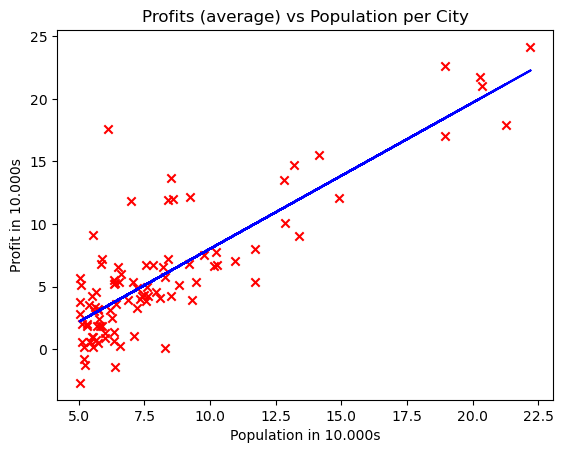

In [56]:
# First plot the linear function fit
plt.plot(x_train, predicted, c = "b") #In blue color
# Plot with scatter plot, the distribution of data points to compare
plt.scatter(x_train, y_train, marker='x', c = "r") # In red color for data points
# Set the title
plt.title("Profits (average) vs Population per City")
# Set the y-axis label
plt.ylabel("Profit in 10.000s")
# Set the x-axis lable
plt.xlabel("Population in 10.000s")

The values obtained for parameters 'w' and 'b' are most useful to make predictions, as in the follwing code cell below:

In [57]:
prediction_1 = 5.5 * w + b
print('For population = 35,000, we predict a profit of $%.2f' % (prediction_1*10000))
prediction_2 = 6.0 * w + b
print('For population = 70,000, we predict a profit of $%.2f' % (prediction_2*10000))

For population = 35,000, we predict a profit of $27847.01
For population = 70,000, we predict a profit of $33678.83
